## Import all the Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#ignore the warnings
import warnings
warnings.filterwarnings('ignore')

## Import the Data and Inspect the data

In [2]:
# create a dataframe and read the dataset
bike_data = pd.read_csv("day.csv")

In [3]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Inspect the data by checking on :
  ##No. of rows, columns, 
  ##datatypes of columns, 
  ##check if there is any NUll values in column, 
  ##check some numerical summaries on the data

In [5]:
##No. of rows, columns
bike_data.shape

(730, 16)

In [6]:
##datatypes of columns
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
##check if there is any NUll values in column
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
##check some numerical summaries on the data
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Observations on Data Inspection:
There are 730 rows and 16 columns


### Data Preparation and Data Cleaning

In [9]:
## Drop the columns "casual" and "registered" as these are not target/dependant variable. 
## And also these 2 columns are not input variables/predictor/feature variable
bike_data.drop(['casual','registered'], axis=1, inplace=True)

In [10]:
# drop "dteday" since other columns like month , year, weekday, workingday details are already present
bike_data.drop(["dteday"],axis=1,inplace=True)
bike_data.head(3)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349


In [11]:
## Map the column values to its respective categorical string values for EDA
## The respective categorical string values are given in data dictionary

## create the mapping dictionary for 'season' column
season_map={1:'spring', 2:'summer', 3:'fall', 4:'winter'}
## Map the column values in 'season' with the mapped values
bike_data["season"]=bike_data['season'].map(season_map)
bike_data.head(3)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349


In [12]:
## create the mapping dictionary for 'yr' coulum
year_map={0:2018,1:2019}
## Map the column values in 'yr' with the mapped values
bike_data["yr"]=bike_data['yr'].map(year_map)
bike_data.head(3)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,spring,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,spring,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,spring,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349


In [13]:
## create the mapping dictionary for 'mnth' coulum
month_map={1:'Jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}
## Map the column values in 'mnth' with the mapped values
bike_data["mnth"]=bike_data['mnth'].map(month_map)
bike_data.head(5)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,spring,2018,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,spring,2018,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,spring,2018,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,spring,2018,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,spring,2018,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
## create mapping for weekday column and map the categorical string values to "weekday" column
## I have assumed 0 - 6 as Sun - Sat.

weekday_map={ 0: 'Sun', 1: 'Mon', 2: 'Tues',3: 'Wed', 4: 'Thurs', 5: 'Fri', 6: 'Sat'}
bike_data["weekday"]=bike_data['weekday'].map(weekday_map)
bike_data.head(5)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,spring,2018,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,spring,2018,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,spring,2018,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,spring,2018,Jan,0,Tues,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,spring,2018,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
## create mapping for weathersit column and map the categorical string values to "weathersit" column
weathersit_map={1: "Clear",2: "Mist_Cloudy",3: "Light Snow",4: "Heavy Rain"}
bike_data["weathersit"]=bike_data['weathersit'].map(weathersit_map)
bike_data.head(3)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,spring,2018,Jan,0,Sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2,spring,2018,Jan,0,Sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,3,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349


In [16]:
## the columns "workingday" and "holiday" has binary values
## It is not required to convert them into intuitive values for EDA

# It shows that if the day is working or non-working day : 1=working day , 0= non working day
bike_data['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [17]:
# It shows that hoilday contains binary values : 1= holiday , 0=not holiday
bike_data['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [18]:
# Check the sample data 
bike_data.head(6)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,spring,2018,Jan,0,Sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2,spring,2018,Jan,0,Sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,3,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,spring,2018,Jan,0,Tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,6,spring,2018,Jan,0,Thurs,1,Clear,8.378268,11.66045,51.8261,6.000868,1606


### Data Visualization

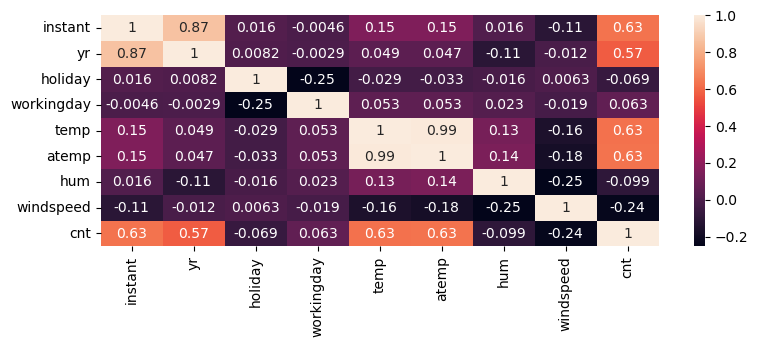

In [19]:
# Visualize the correlation between the variables
plt.figure(figsize=(9,3))
sns.heatmap(bike_data.corr(), annot = True)
plt.show()

#### High correlation exist between 'temp' and 'atemp', hence we can drop one of the variable
#### instant column(record index) can be dropped since it doesnt contribute to analysis

We can observe that temp and atemp has nearly same correlation with 'cnt' variable
lets find which one has the highest correlation

In [20]:
correlation1 = bike_data['temp'].corr(bike_data['cnt'])
correlation1

0.6270440344135154

In [21]:
correlation2 = bike_data['atemp'].corr(bike_data['cnt'])
correlation2

0.6306853489531039

We can see that atemp has highest correlation with cnt

In [22]:
bike_data.drop(['atemp','instant'],axis=1, inplace=True)

In [23]:
bike_data.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,0,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349


<Figure size 2400x600 with 0 Axes>

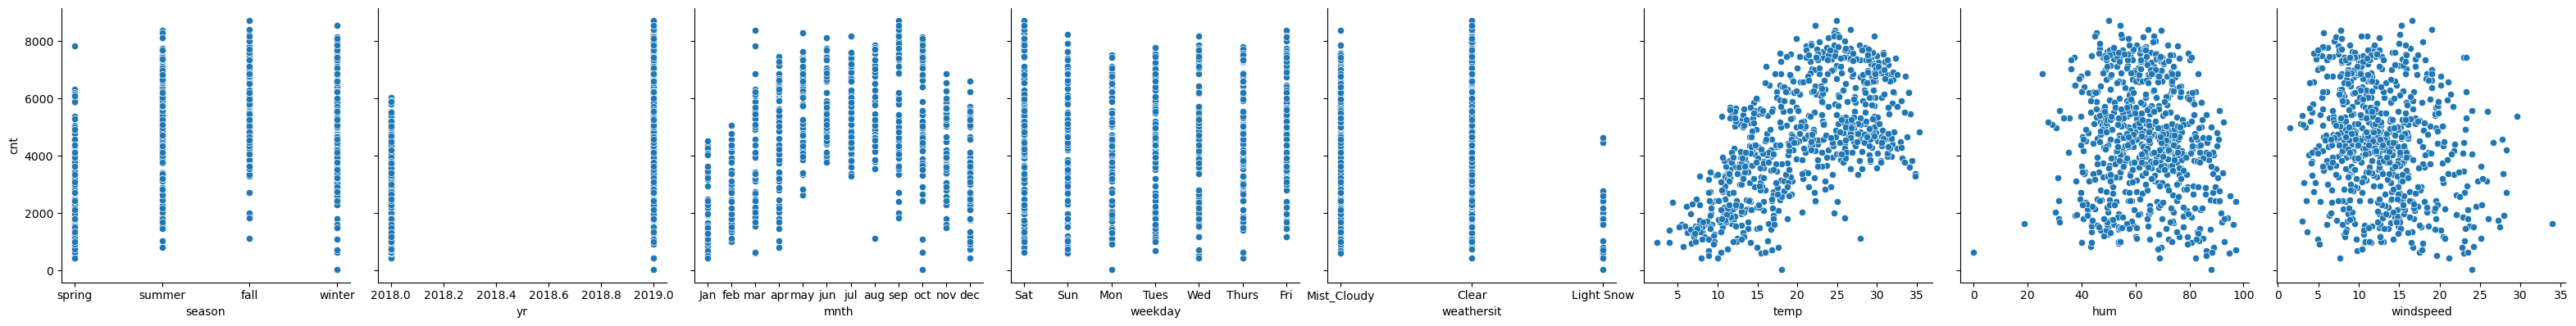

In [24]:
#Setting the figure size of plot
plt.figure(figsize=(24,6))

sns.pairplot(bike_data, 
             x_vars=['season', 'yr','mnth','weekday','weathersit','temp','hum','windspeed'], 
             y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

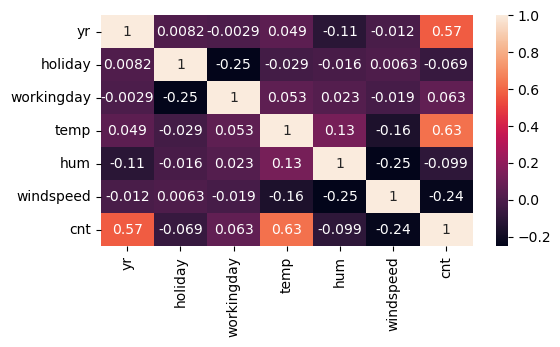

In [25]:
# Visualize the correlation between the remaining variables
plt.figure(figsize=(6,3))
sns.heatmap(bike_data.corr(), annot = True)
plt.show()

#### It looks there is a decent positive correlation for 'temp with Cnt' and  'Year with Cnt'

## Univariate Analysis on 'Cnt' column

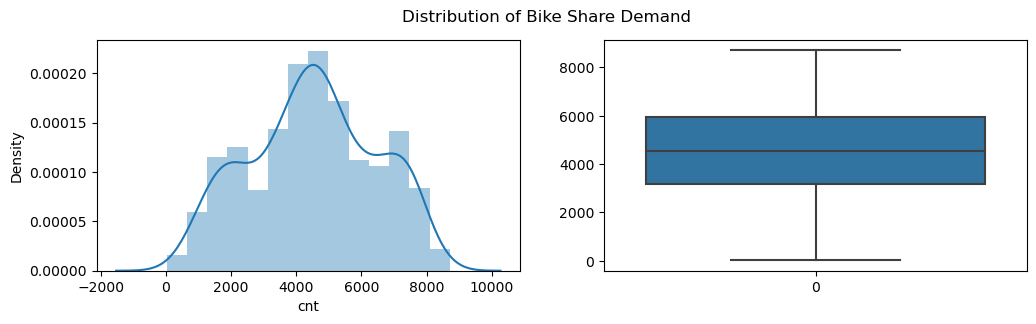

In [26]:
# visualize the distribution of data in the target variable 'Cnt'
#Setting the figure size of plot
plt.figure(figsize=(12,3))

#Setting subplot index
#Histogram plot loan_amnt
plt.subplot(1,2,1)
sns.distplot(bike_data.cnt)

#Box plot loan_amnt
plt.subplot(1,2,2)
sns.boxplot(bike_data.cnt,orient='vertical')

#Title for both the plots
plt.suptitle('Distribution of Bike Share Demand')
plt.show()

## Univariate Ananlysis on input variables

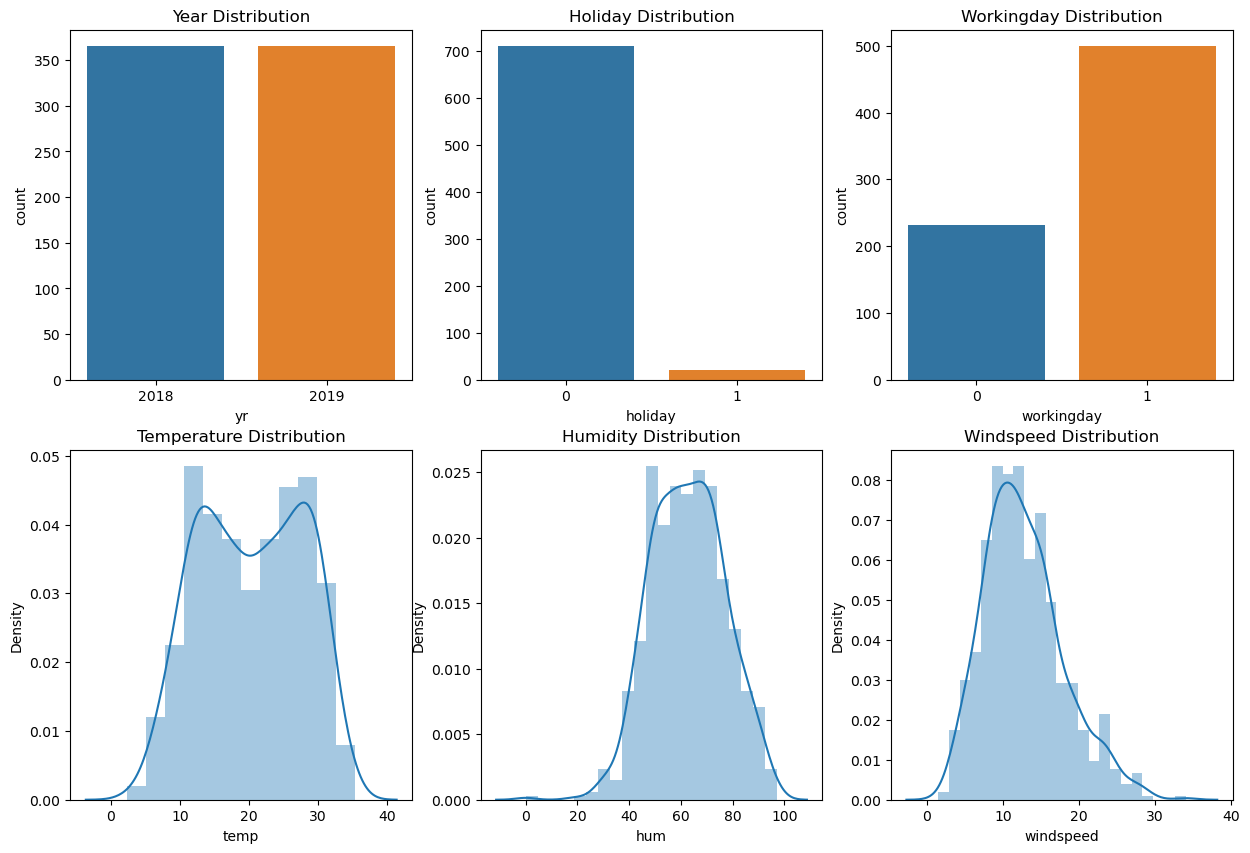

In [27]:
#Setting the figure size of plot
plt.figure(figsize=(15,10))

#Countplot for year
plt.subplot(2,3,1)
sns.countplot(x='yr', data = bike_data)
#Title for the subplot yr
plt.title('Year Distribution')

#Countplot for holiday
plt.subplot(2,3,2)
sns.countplot(x='holiday', data = bike_data)
#Title for the subplot holiday
plt.title('Holiday Distribution')

#Countplot for workingday
plt.subplot(2,3,3)
sns.countplot(x='workingday', data = bike_data)
#Title for the subplot workingday
plt.title('Workingday Distribution')

#Distplot for temp
plt.subplot(2,3,4)
sns.distplot(bike_data.temp)
#Title for the subplot temp
plt.title('Temperature Distribution')

#Distplot for hum
plt.subplot(2,3,5)
sns.distplot(bike_data.hum)
#Title for the subplot hum
plt.title('Humidity Distribution')

#Distplot for windspeed
plt.subplot(2,3,6)
sns.distplot(bike_data.windspeed)
#Title for the subplot windspeed
plt.title('Windspeed Distribution')

plt.show()

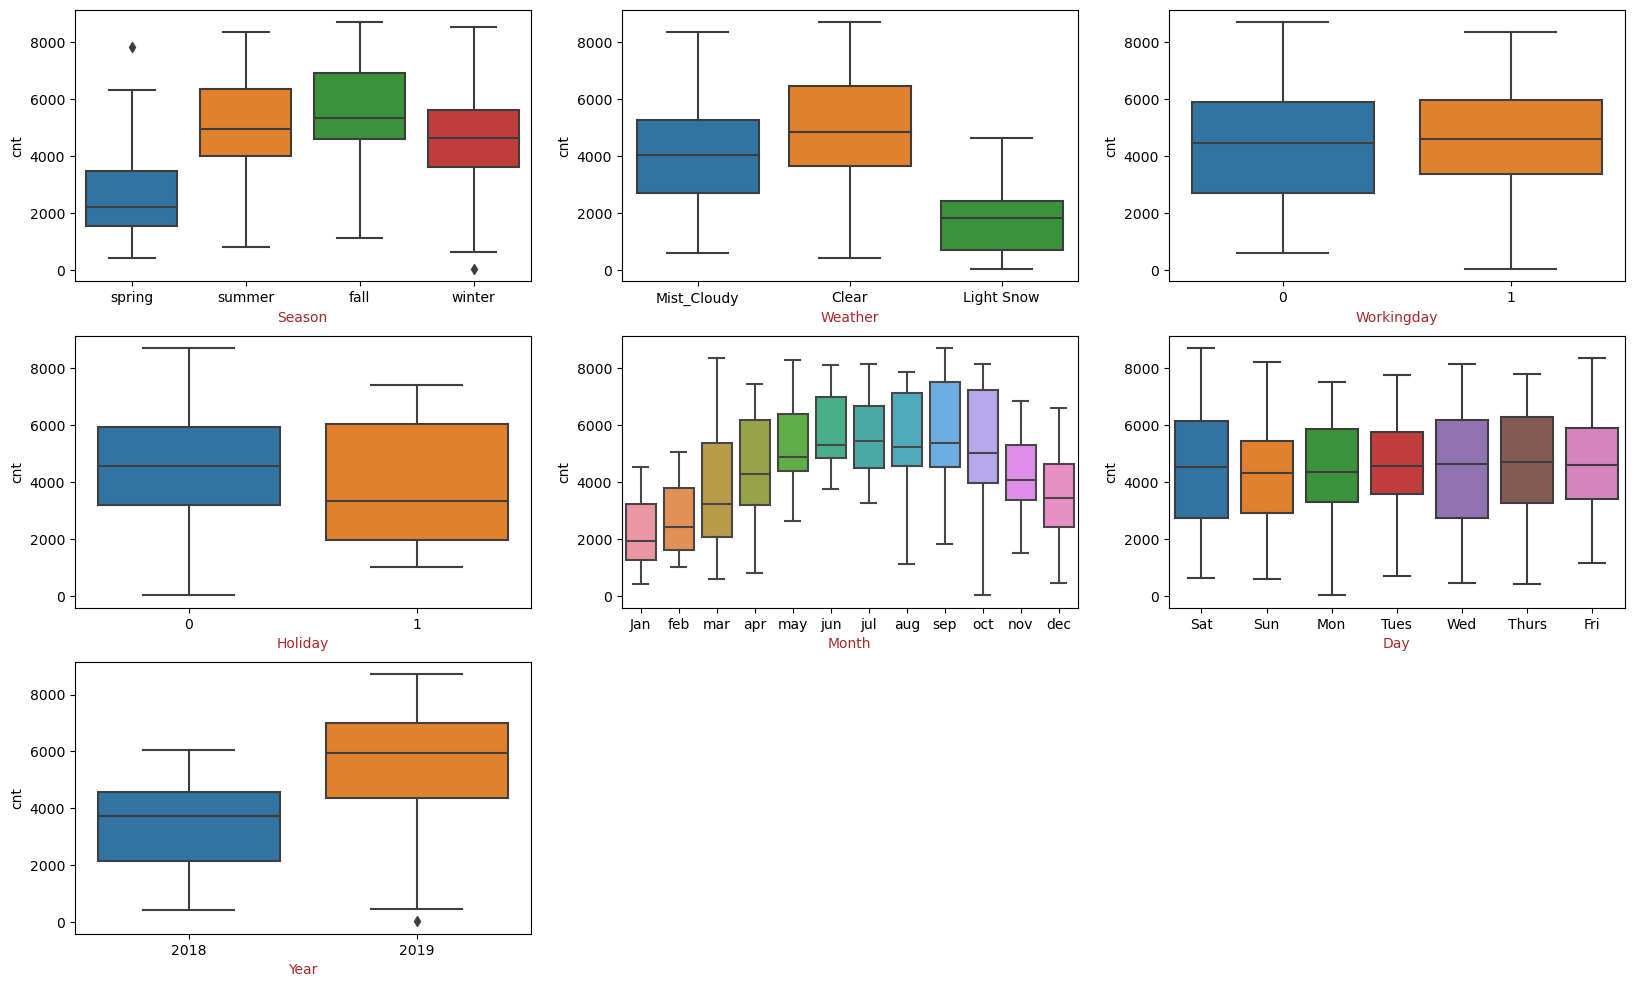

In [28]:
# Visualise the categorical variables with Target variable


plt.figure(figsize=(20, 12))

plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.xlabel('Season', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(3,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.xlabel('Weather', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.xlabel('Workingday', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.xlabel('Holiday', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.xlabel('Month', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.xlabel('Day', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.xlabel('Year', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})


plt.show()

#### Observation
There are no outliers in the data </br>
Weather is impacting the rental counts as clearly visible from the plot. </br>
The median value is highest when the weather is clear and then decreasing as the weather becomes worse</br>.
Summer and Fall are more favourable seasons.</br>
Working day have a very little impact.<br>
More bikes are rented between the months of summer - autumn around Jun-Oct.</br>
Rental count seems not varying much across days </br>
Rental demand is more on weekday

## Data Prepration

Processing the Data will involve below steps:
1. Check for Binary variables ex. Yes/No , need to encode to 1/0
2. Convert Categorical Variables to dummy variables before feeding to the model
3. Split Dataset in Train-Test set
4. Rescaling the input predictor variables whether required

In [29]:
# check the dataset info
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [30]:
bike_data.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,0,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349


- Check the different values/levels present in the categorical input variable
Ex. season , mnth,weekday,weathersit </br>
- Input variables - yr and workingday are of int datatypes , but as per data dictionary
there can be binary values present.

In [31]:
#Check different values/levels present in season variable
bike_data.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [32]:
#Check different values/levels present in yr variable
bike_data.yr.value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [33]:
#Check different values/levels present in mnth variable
bike_data.mnth.value_counts()

Jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: mnth, dtype: int64

In [34]:
#Check different values/levels present in weekday variable
bike_data.weekday.value_counts()

Sat      105
Sun      105
Mon      105
Tues     104
Thurs    104
Fri      104
Wed      103
Name: weekday, dtype: int64

In [35]:
#Check different values/levels present in holiday variable
bike_data.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [36]:
#Check different values/levels present in workingday variable
bike_data.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [37]:
#Check different values/levels present in weathersit variable
bike_data.weathersit.value_counts()

Clear          463
Mist_Cloudy    246
Light Snow      21
Name: weathersit, dtype: int64

##### Binary Values are present in below variables : yr,holiday,workingday
- varibles - holiday & workingday already have binary values 1/0 hence no action is required here. </br>
- variable 'yr' is having 2 values 2018 & 2019 , we need to encode this to 1 & 0 a per data dictionary
##### Dummy Variables :
We need to create Dummy variables for - season,weekday,mnth and weathersit

In [38]:
#converting yr column values to 1/0 as per data dictionary
bike_data.yr=bike_data.yr.map({2018:0, 2019:1})

In [39]:
bike_data.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349


In [40]:
bike_data.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [41]:
# creating dummies for season,mnth and weathersit column 
dummy_data = pd.get_dummies(bike_data[['season','mnth','weekday','weathersit']], drop_first = True)
dummy_data.head(3)

,season_spring,season_summer,season_winter,mnth_apr,mnth_aug,mnth_dec,mnth_feb,mnth_jul,mnth_jun,mnth_mar,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light Snow,weathersit_Mist_Cloudy
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [42]:
# concatenate the dummy data with the main dataframe

bike_data=pd.concat([bike_data,dummy_data],axis=1)
bike_data.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light Snow,weathersit_Mist_Cloudy
0,spring,0,Jan,0,Sat,0,Mist_Cloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,Mist_Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0


In [43]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season                  730 non-null    object 
 1   yr                      730 non-null    int64  
 2   mnth                    730 non-null    object 
 3   holiday                 730 non-null    int64  
 4   weekday                 730 non-null    object 
 5   workingday              730 non-null    int64  
 6   weathersit              730 non-null    object 
 7   temp                    730 non-null    float64
 8   hum                     730 non-null    float64
 9   windspeed               730 non-null    float64
 10  cnt                     730 non-null    int64  
 11  season_spring           730 non-null    uint8  
 12  season_summer           730 non-null    uint8  
 13  season_winter           730 non-null    uint8  
 14  mnth_apr                730 non-null    ui

In [44]:
# drop the categorical columns from the dataset since we have the dummy data now
bike_data.drop(['season','mnth','weekday','weathersit'],axis=1, inplace=True)

In [45]:
# checking data info
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      730 non-null    int64  
 1   holiday                 730 non-null    int64  
 2   workingday              730 non-null    int64  
 3   temp                    730 non-null    float64
 4   hum                     730 non-null    float64
 5   windspeed               730 non-null    float64
 6   cnt                     730 non-null    int64  
 7   season_spring           730 non-null    uint8  
 8   season_summer           730 non-null    uint8  
 9   season_winter           730 non-null    uint8  
 10  mnth_apr                730 non-null    uint8  
 11  mnth_aug                730 non-null    uint8  
 12  mnth_dec                730 non-null    uint8  
 13  mnth_feb                730 non-null    uint8  
 14  mnth_jul                730 non-null    ui

In [46]:
# checking the data for the changes
bike_data.head(3)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light Snow,weathersit_Mist_Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Split Dataset into Train and Test Dataset

We will split the data into 70-30 ratio i.e. Train set = 70% data and Test set = 30% data

In [47]:
from sklearn.model_selection import train_test_split

bike_train, bike_test = train_test_split(bike_data, train_size = 0.70, test_size = 0.30, random_state = 100)

In [48]:
# check the shape of train dataset
bike_train.shape

(510, 29)

In [49]:
# check the shape of test dataset
bike_test.shape

(219, 29)

### Rescaling the values in the columns of Training set
- We will use min-max scaler for standardizing the data
- We will not use scaler on the columns(dummy variables) having binary encoded values 1/0

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply MinMaxScaler to all the numerical columns except the dummy variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [51]:
#check train data
bike_train.head(3)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light Snow,weathersit_Mist_Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [52]:
# check describe on train data
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light Snow,weathersit_Mist_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


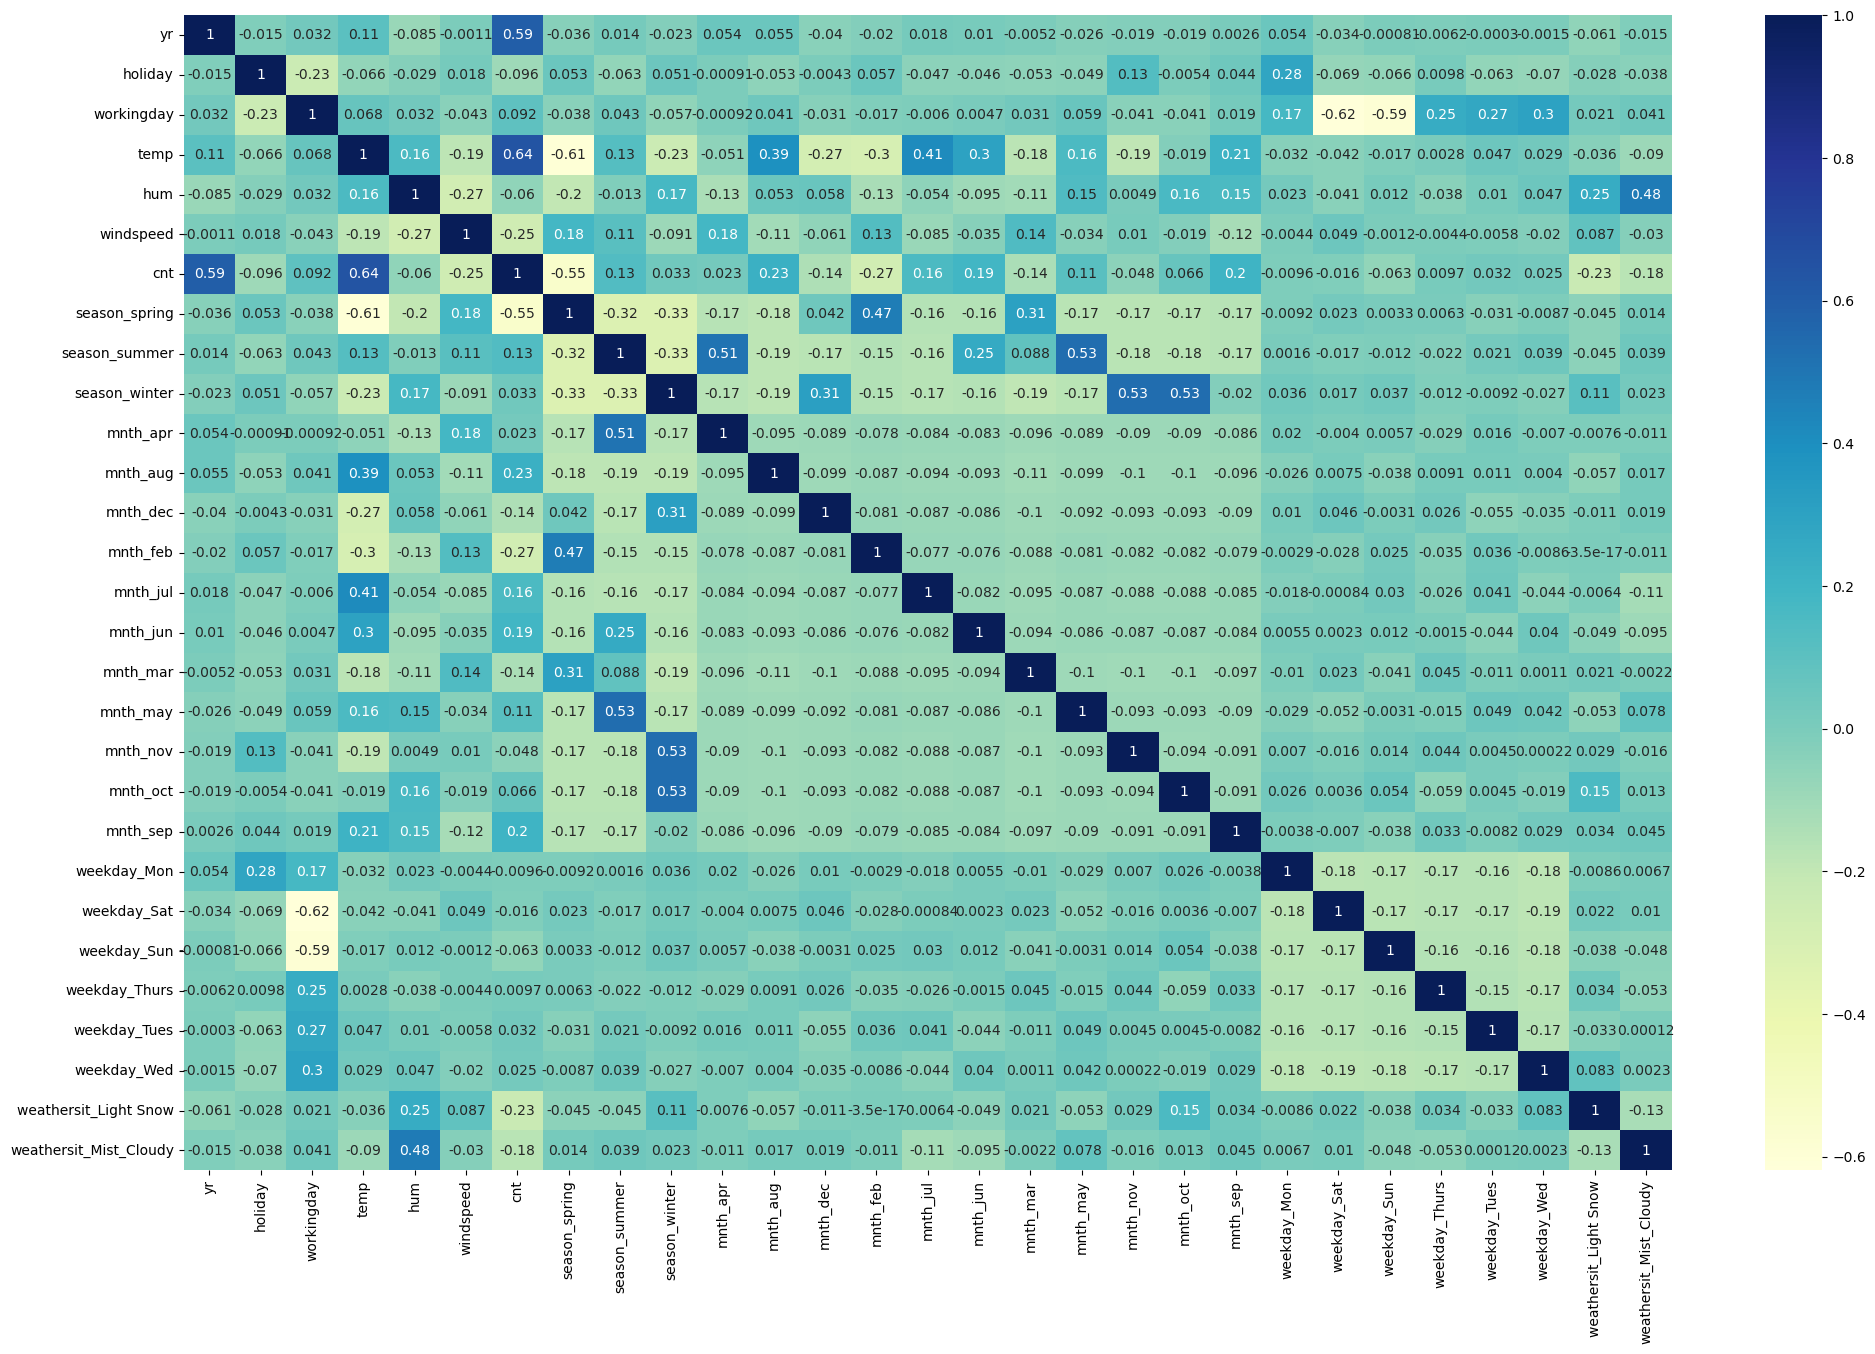

In [53]:
# check the correlation between all variables to see which variables are highly correlated
plt.figure(figsize=[24, 15])
sns.heatmap(bike_train.corr(), cmap = "YlGnBu", annot = True)
plt.show()

### Model Building - creating X and Y sets from Training data

In [54]:
y_train = bike_train.pop('cnt')
X_train = bike_train

### Perform RFE - Recursive Feature Elimination

- First we will use RFE for automatic feature elimination. 
- Further manual refining of the model will be done on the columns we get after performing RFE

In [55]:
# Importing RFE and LinearRegression methods

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [56]:
# Running RFE with the output number of the variable equal to 12

lr = LinearRegression()
lr.fit(X_train, y_train)
rfe = RFE(estimator=lr, n_features_to_select=12)             
rfe = rfe.fit(X_train, y_train)

In [57]:
# Listing the columns with the RFE ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 9),
 ('season_winter', False, 2),
 ('mnth_apr', False, 5),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 14),
 ('mnth_feb', False, 10),
 ('mnth_jul', False, 15),
 ('mnth_jun', False, 6),
 ('mnth_mar', False, 4),
 ('mnth_may', False, 3),
 ('mnth_nov', False, 13),
 ('mnth_oct', False, 8),
 ('mnth_sep', True, 1),
 ('weekday_Mon', False, 11),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thurs', False, 16),
 ('weekday_Tues', False, 12),
 ('weekday_Wed', False, 17),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [58]:
# Extracting the list of columns those are significant/supported as per RFE

col_support = X_train.columns[rfe.support_]
col_support

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'mnth_sep', 'weekday_Sat', 'weekday_Sun',
       'weathersit_Light Snow', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [59]:
# Extracting the columns those are not significant as per RFE

X_train.columns[~rfe.support_]

Index(['season_summer', 'season_winter', 'mnth_apr', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_oct', 'weekday_Mon', 'weekday_Thurs', 'weekday_Tues',
       'weekday_Wed'],
      dtype='object')

### Building model using statsmodel
We will use statsmodel because it will be give detailed statistics

### Model 1

In [60]:
# Creating X_train dataframe with variables which we got from RFE

X_train_rfe = X_train[col_support]

In [61]:
# Adding a constant variable 

import statsmodels.api as sm 

X_train_lm1 = sm.add_constant(X_train_rfe)

# Running the linear model 1

lm1 = sm.OLS(y_train,X_train_lm1).fit() 

# summary of our linear model

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.0
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.29e-183
Time:                        23:10:46   Log-Likelihood:                 490.34
No. Observations:                 510   AIC:                            -956.7
Df Residuals:                     498   BIC:                            -905.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Observation
- Since R-squared is 0.84, so we can say say that around 83% of the variances in 'cnt' can be explained by these independent variables.
- The probability of most independent variables are nearly 0 means most valriables are significant
- holiday variable have high p-value.
- Co-efficient of few variables are negative.
- Lets see the VIF calculation to ensure there is no multicollinearity.

In [62]:
# Check VIF

# import the required library
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_new = X_train_lm1.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,36.05
8,weekday_Sat,8.80
9,weekday_Sun,8.60
1,holiday,2.31
4,hum,1.81
3,temp,1.71
6,season_spring,1.62
11,weathersit_Mist_Cloudy,1.54
10,weathersit_Light Snow,1.24
5,windspeed,1.16


### Model 2

In [63]:
# remove holiday column since p-value is high and VIF is low

X_train_lm2 = X_train_lm1.drop('holiday', axis = 1)

# Build a second fitted model
X_train_lm2 = sm.add_constant(X_train_lm2)
lm2 = sm.OLS(y_train,X_train_lm2).fit() 

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.0
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.29e-183
Time:                        23:10:46   Log-Likelihood:                 490.34
No. Observations:                 510   AIC:                            -956.7
Df Residuals:                     498   BIC:                            -905.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [64]:
# Check VIF

# import the required library
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_new = X_train_lm2.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.52
1,workingday,16.42
2,temp,10.64
4,windspeed,4.46
7,weekday_Sat,4.42
8,weekday_Sun,4.33
10,weathersit_Mist_Cloudy,2.18
0,yr,2.06
5,season_spring,1.95
9,weathersit_Light Snow,1.22


### Model 3

In [65]:
## weekday_Sun has high p-value as 0.071 which is > 0.05 , and low VIF is 4.33
## hence we can drop weekday_Sun
X_train_lm3 = X_train_lm2.drop('weekday_Sun', axis = 1)

# Build a 3rd fitted model
X_train_lm3 = sm.add_constant(X_train_lm3)
lm3 = sm.OLS(y_train,X_train_lm3).fit() 

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.7
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          4.11e-184
Time:                        23:10:46   Log-Likelihood:                 488.67
No. Observations:                 510   AIC:                            -955.3
Df Residuals:                     499   BIC:                            -908.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [66]:
# Check VIF

# import the required library
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_new = X_train_lm3.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.35
2,temp,9.96
1,workingday,4.61
4,windspeed,4.02
9,weathersit_Mist_Cloudy,2.10
0,yr,2.03
5,season_spring,1.86
7,weekday_Sat,1.80
8,weathersit_Light Snow,1.19
6,mnth_sep,1.16


### Model 4

In [67]:
## The p-values for all variables look fine
## The VIF value for hum,temp is high.
## Remove 'hum'variable first with high VIF
X_train_lm4 = X_train_lm3.drop('hum', axis = 1)

# Build a 4th fitted model
X_train_lm4 = sm.add_constant(X_train_lm4)
lm4 = sm.OLS(y_train,X_train_lm4).fit() 

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.1
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          5.29e-184
Time:                        23:10:46   Log-Likelihood:                 485.52
No. Observations:                 510   AIC:                            -951.0
Df Residuals:                     500   BIC:                            -908.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [68]:
# Check VIF

# import the required library
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_new = X_train_lm4.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.35
1,workingday,4.25
3,windspeed,3.92
0,yr,2.03
6,weekday_Sat,1.73
4,season_spring,1.63
8,weathersit_Mist_Cloudy,1.51
5,mnth_sep,1.15
7,weathersit_Light Snow,1.07


We will not remove temp although the VIF >5 , because we have seen earlier in visualization and correlation matrix
that temp is correlated with cnt </br>
Model 4 seems to be fine where all the predictor variables have low p-value and low VIF value

### Evaluation of the Final Model
Check the assumptions of Linear Regression</br>
- Error terms are Normally distributed </br>
- Linear relationship</br>
- Error terms have constant variance i.e. Homoscedasticity <br>
- Multicollinearity does not exist between variables

In [69]:
## Find the Y predicted value in the Train set
y_train_pred = lm4.predict(X_train_lm4)

Text(0.5, 0, 'Errors')

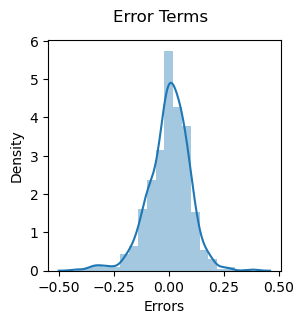

In [70]:
# Check the distribution of the error terms

fig = plt.figure(figsize=(3,3))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms')                   
plt.xlabel('Errors') 

We can see that the error terms are normally distributed

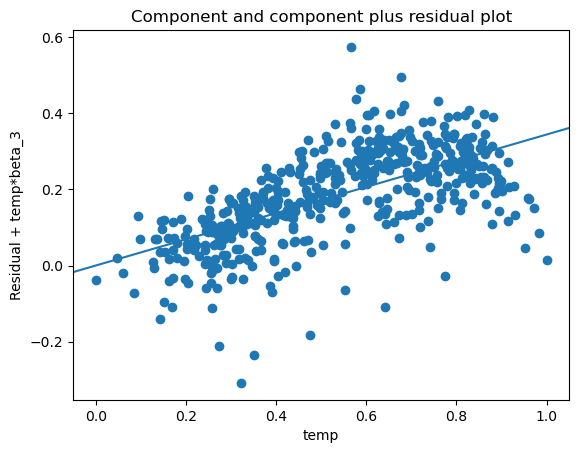

In [71]:
# Plotting graph to check linear relation between target and predictor variable w.r.t. 'temp' column

sm.graphics.plot_ccpr(lm4, 'temp')
plt.show()

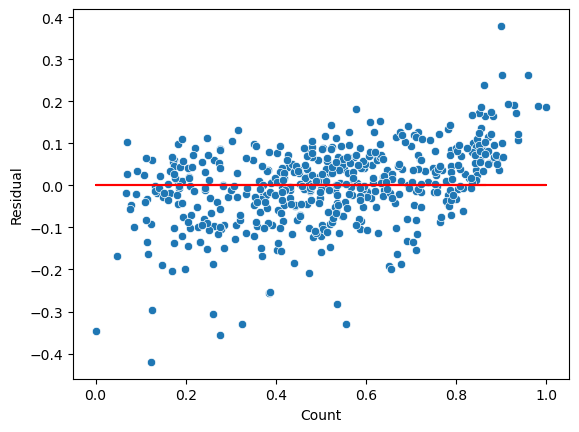

In [72]:
# Check whether the residuals have constant variance Vs target variable 'cnt' .ie.Validating Homoscedasticity

sns.scatterplot(x=y_train,y=(y_train - y_train_pred))
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

We can see that the variance of the residuals are almost constant. Hence, check Homoscedasticity holds for the model#4

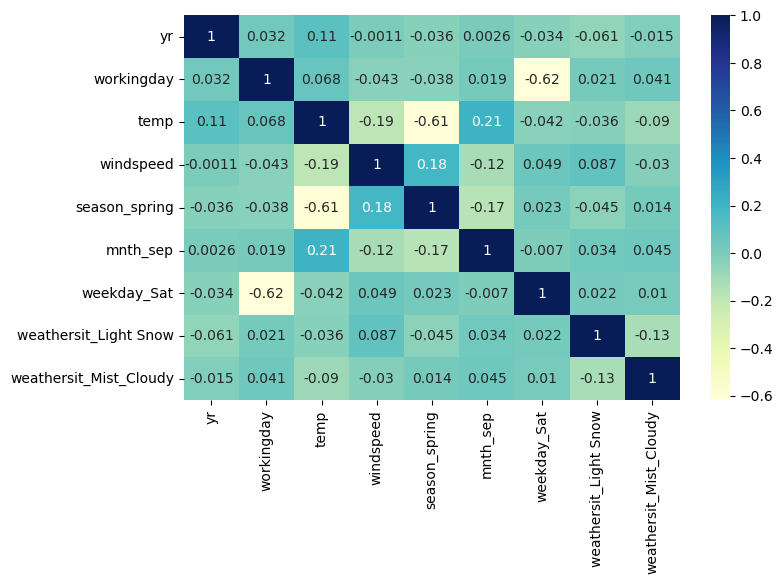

In [73]:
## checking the correlation among the variables
plt.figure(figsize=(8,5))
sns.heatmap(X_train_new.corr(),annot=True, cmap='YlGnBu')
plt.show()

We can see that the absolute value of correlation coefficient is less than the threshold 0.7 or 0.8.</br>
Hence we can conclude that there is no multicollinearity

### Making Predictions Using the Final Model

In [74]:
# Scale to all the numerical columns except the binary variables and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [75]:
# check the describe on the test data after 
bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light Snow,weathersit_Mist_Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
# Creating X and Y from test data
y_test = bike_test.pop('cnt')
X_test = bike_test

In [77]:
# Creating X_test by selecting columns from final X_train

cols = X_train_new.columns
X_test = X_test[cols]

# Adding constant to the test dataframe
X_test = sm.add_constant(X_test)

# Making predictions using the 4th model

y_pred = lm4.predict(X_test)

### Model Evaluation on Test set

Text(0, 0.5, 'Predicted bike count\n')

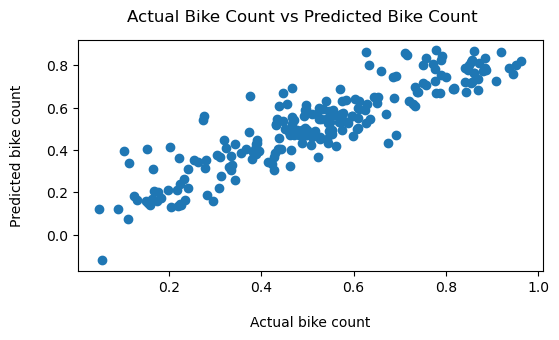

In [78]:
# Plotting y_test and y_pred to understand the spread of data points

fig = plt.figure(figsize=(6,3))
plt.scatter(y_test, y_pred)
fig.suptitle('Actual Bike Count vs Predicted Bike Count\n')               
plt.xlabel('\nActual bike count')                          
plt.ylabel('Predicted bike count\n')  

Model looks decent and datapoints are closely tied

The Linear Equation of our model is :

cnt=0.2784 + 0.2369 * yr + 0.0529*workingday + 0.3446*temp - 0.1494*windspeed - 0.1524*season_spring +
0.0652*mnth_sep + 0.0643*weekday_Sat - 0.2842 * weathersit_Light_Snow-0.0810*weathersit_Mist_Cloudy

Since the coefficients of the independent variables are significant, we can reject the null hypothesis.

### R-squared score on the test set

In [79]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8040856981145517

where, y_test is the test data set , and y_pred is the variable containing the predicted values of the target variable on the test set.

## Conclusion

High demand is observed on days with favorable weather conditions and elevated temperatures. Consequently, the company should consider implementing promotional activities or offering discounts during the summer season. Moreover, ensuring an ample supply of bikes during the summer months will be essential to meet the heightened demand, leading to increased sales or, in this context, a rise in rental bike counts.